## Causal Graph

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

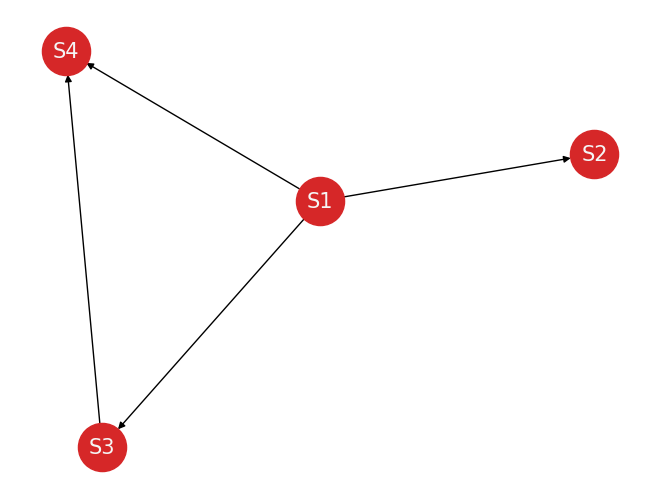

In [ ]:
## Build the causal graph and display it
# A directed graph
graph = nx.DiGraph()
# Add edges
graph.add_edge("S1","S2")
graph.add_edge("S1","S3")
graph.add_edge("S1","S4")
graph.add_edge("S3","S4")


# Set layout and draw the causal graph
nx.draw(graph, pos=nx.nx_agraph.graphviz_layout(graph), node_size=1200, font_size=15, font_color="whitesmoke", node_color="tab:red", with_labels=True)

## Data Generation

### Initial Setup

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

### Fixed Treatment Counterfactual

In [ ]:
## Generating Counterfactual data for S4 by fixing S3 to be a constant 1

#Size of time-series: t
t = 100000

#Create noise
np.set_printoptions(suppress=True)
noise = np.random.normal(0,1,t)
print(noise.size)

#Variable 1
source1 = np.zeros((t))
for i in range(0,t):
  if(i<10):
    source1[i] = np.cos(i/10) + noise[i]*0.1
  else:
    source1[i] = np.cos(i/10) + np.log(np.abs(source1[i-6] - source1[i-10]) + 1) + noise[i]*0.1


#Variable 2
source2 = np.zeros((t))
np.set_printoptions(suppress=True)
noise2 = np.random.normal(0,1,t)
noise2
import math
source2[1] = noise2[1]
source2[2] = noise2[2]
for x in range(3,t):
  if source1[x-1] > 0:
     source2[x] = 1.2*math.exp(-source1[x-1]*source1[x-1]/2) + noise2[x]
  else:
     source2[x] = -2*math.exp(-source1[x-1]*source1[x-1]) + noise2[x]

#Variable 3
source3 = np.zeros((t))
np.set_printoptions(suppress=True)
noise3 = np.random.normal(0,1,t)
noise3
import math
source3[1] = noise3[1]
source3[2] = noise3[2]
for x in range(3,t):
  source3[x] = -1.05*math.exp(-source1[x-1]*source1[x-1]/2) + noise3[x]

#Variable 4
source4 = np.zeros((t))
source4_cf0 = np.zeros((t))
source4_cf1 = np.zeros((t))
treat = np.zeros((t))
np.set_printoptions(suppress=True)
noise4 = np.random.normal(0,1,t)
import math
source4[1] = noise4[1] + 10
source4[2] = noise4[2] + 10
source4_cf0[1] = noise4[1] + 10
source4_cf0[2] = noise4[2] + 10
source4_cf1[1] = noise4[1] + 10
source4_cf1[2] = noise4[2] + 10
for x in range(3,t):
  source4[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-source3[x-1]*source3[x-1]/2) + noise4[x]
  #Variable 4 = treated
  source4_cf1[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-1*1/2) + noise4[x]
  #Variable 5 = untreated
  source4_cf0[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(0) + noise4[x]


dict={'S1':source1,'S2':source2,'S3':source3,'S4':source4, 'S4_cf1':source4_cf1, 'S4_cf0':source4_cf0}
data=pd.DataFrame(dict)
data.to_csv('synthetic_data_nonlinear_fixed.csv',header=True,index=False)
from google.colab import files
files.download( "synthetic_data_nonlinear_fixed.csv" )

100000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Continuous Treatment Counterfactual

In [ ]:
## Generating Counterfactual data for S4 by increasing S3 by 10% and then by decreasing S3 by 10%

#Size of time-series: t
t = 100000

#Create noise
np.set_printoptions(suppress=True)
noise = np.random.normal(0,1,t)
print(noise.size)

#Variable 1
source1 = np.zeros((t))
for i in range(0,t):
  if(i<10):
    source1[i] = np.cos(i/10) + noise[i]*0.1
  else:
    source1[i] = np.cos(i/10) + np.log(np.abs(source1[i-6] - source1[i-10]) + 1) + noise[i]*0.1


#Variable 2
source2 = np.zeros((t))
np.set_printoptions(suppress=True)
noise2 = np.random.normal(0,1,t)
noise2
import math
source2[1] = noise2[1]
source2[2] = noise2[2]
for x in range(3,t):
  if source1[x-1] > 0:
     source2[x] = 1.2*math.exp(-source1[x-1]*source1[x-1]/2) + noise2[x]
  else:
     source2[x] = -2*math.exp(-source1[x-1]*source1[x-1]) + noise2[x]

#Variable 3
source3 = np.zeros((t))
np.set_printoptions(suppress=True)
noise3 = np.random.normal(0,1,t)
noise3
import math
source3[1] = noise3[1]
source3[2] = noise3[2]
for x in range(3,t):
  source3[x] = -1.05*math.exp(-source1[x-1]*source1[x-1]/2) + noise3[x]

#Variable 4
source4 = np.zeros((t))
source4_cf0 = np.zeros((t))
source4_cf1 = np.zeros((t))
treat = np.zeros((t))
np.set_printoptions(suppress=True)
noise4 = np.random.normal(0,1,t)
import math
source4[1] = noise4[1] + 10
source4[2] = noise4[2] + 10
source4_cf0[1] = noise4[1] + 10
source4_cf0[2] = noise4[2] + 10
source4_cf1[1] = noise4[1] + 10
source4_cf1[2] = noise4[2] + 10
for x in range(3,t):
  source4[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-source3[x-1]*source3[x-1]/2) + noise4[x]
  #Variable 4 = treated
  source4_cf1[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-(1.1 * source3[x-1])*(1.1 * source3[x-1])/2) + noise4[x]
  #Variable 5 = untreated
  source4_cf0[x] = -1.15*math.exp(-source1[x-1]*source1[x-1]/2) + 0.2*math.sqrt(2)*math.exp(-source4[x-1]*source4[x-1]/2) + 1.35*math.exp(-(0.9 * source3[x-1])*(0.9 * source3[x-1])/2) + noise4[x]


dict={'S1':source1,'S2':source2,'S3':source3,'S4':source4, 'S4_cf1':source4_cf1, 'S4_cf0':source4_cf0}
data=pd.DataFrame(dict)
data.to_csv('synthetic_data_nonlinear_continuous.csv',header=True,index=False)
from google.colab import files
files.download( "synthetic_data_nonlinear_continuous.csv" )

100000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## [Additional] Synthetic Time Series from TDS Tutorial
Source: https://towardsdatascience.com/time-series-analysis-creating-synthetic-datasets-cf008208e014

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,7))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

Creating trend in Time Series

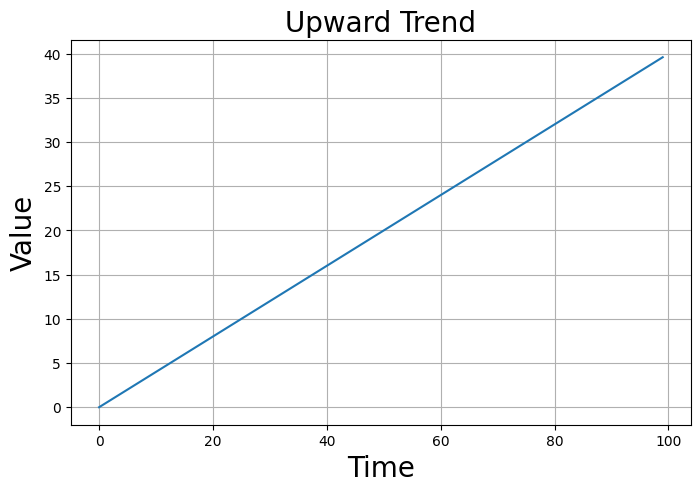

In [ ]:
time = np.arange(100)
values = time*0.4
plot_time_series(time, values, "Upward Trend")

Seasonality in Time Series

In [ ]:
# Just a random pattern
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
for i in range(50):
  print(time[i], values[i])
# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality")

Adding Noise

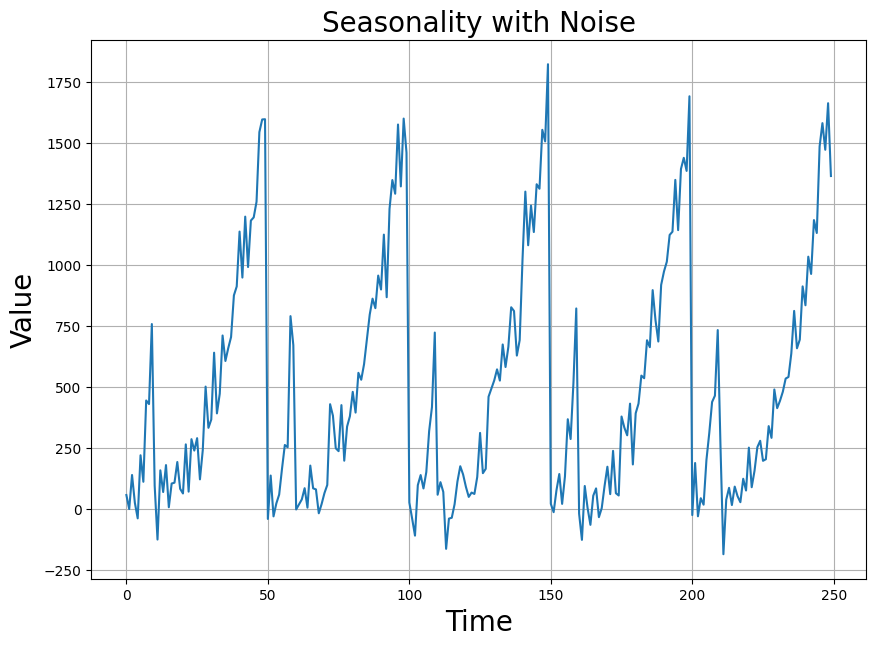

In [ ]:
noise = np.random.randn(250)*100
seasonal += noise
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

Combining Trend + Seasonality + Noise

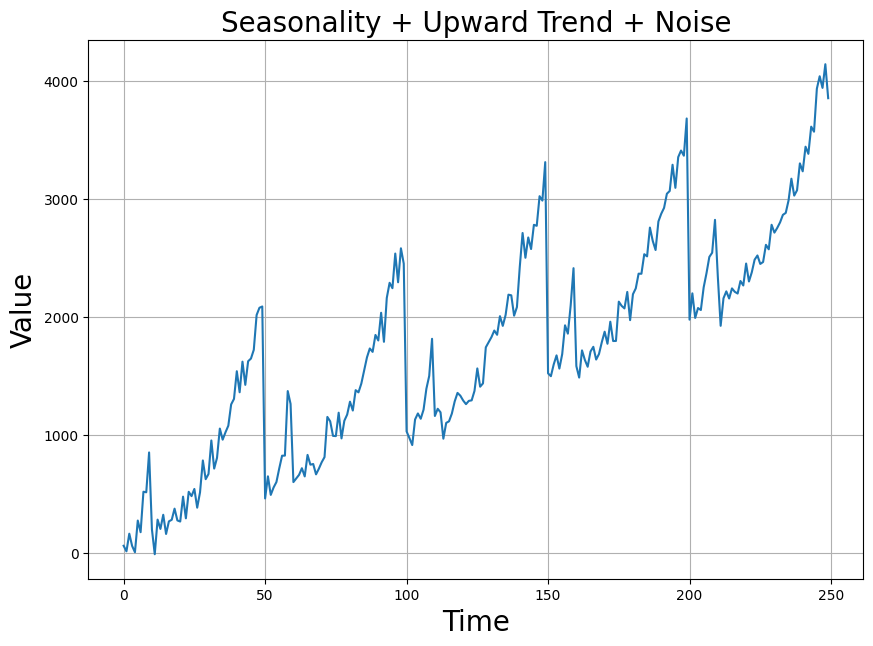

In [ ]:
x = np.linspace(0, 50, 250)
seasonal_upward = np.sin(x) + seasonal + np.arange(250)*10


time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

Non-stationary Time Series

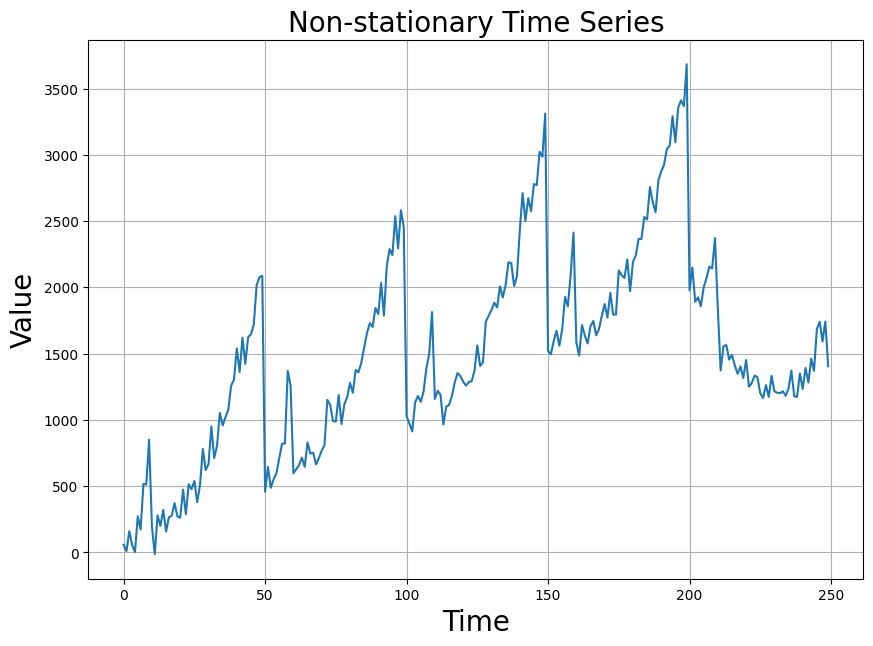

In [ ]:
big_event = np.zeros(250)
x = np.linspace(0, 50, 250)
big_event[-50:] = np.arange(50)*-50
non_stationary = np.sin(x) + seasonal_upward + big_event
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, non_stationary, label="Non-stationary Time Series")

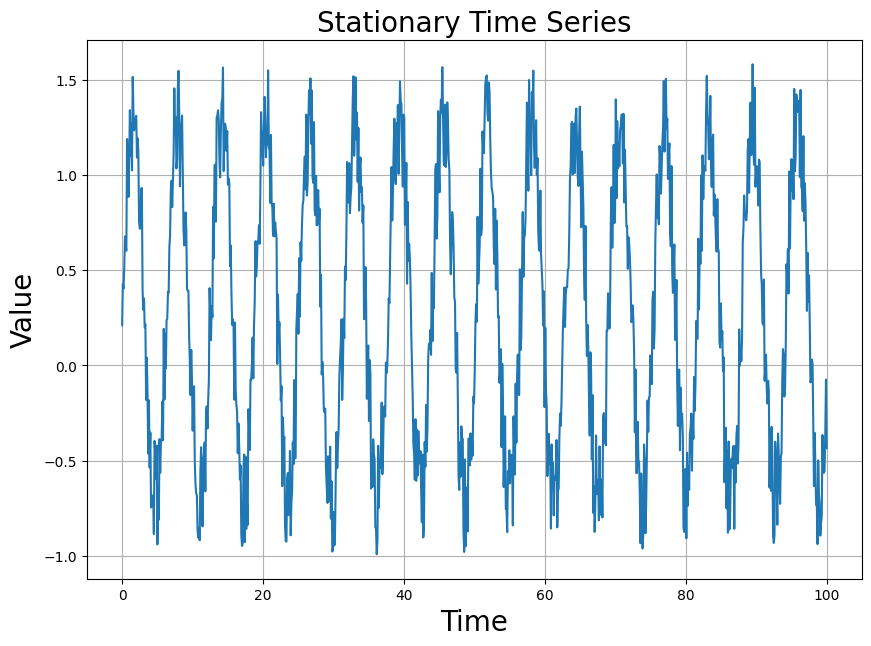

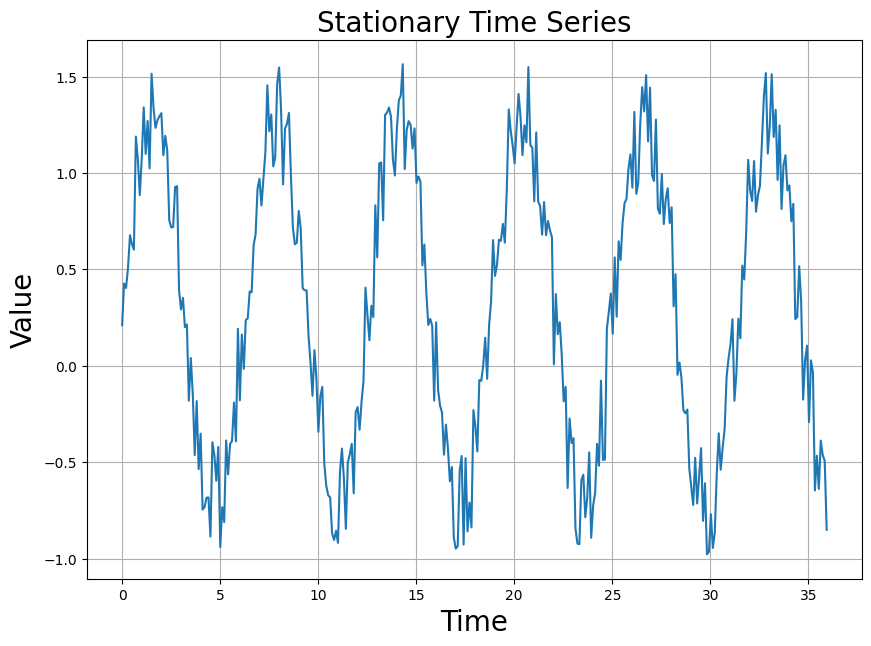

In [ ]:
noise_strength = 0.6
x = np.linspace(0, 100, 1000)
y = np.sin(x) + np.random.rand(len(x))*noise_strength
plot_time_series(x, y, label="Stationary Time Series")
plot_time_series(x[:360], y[:360], label="Stationary Time Series")

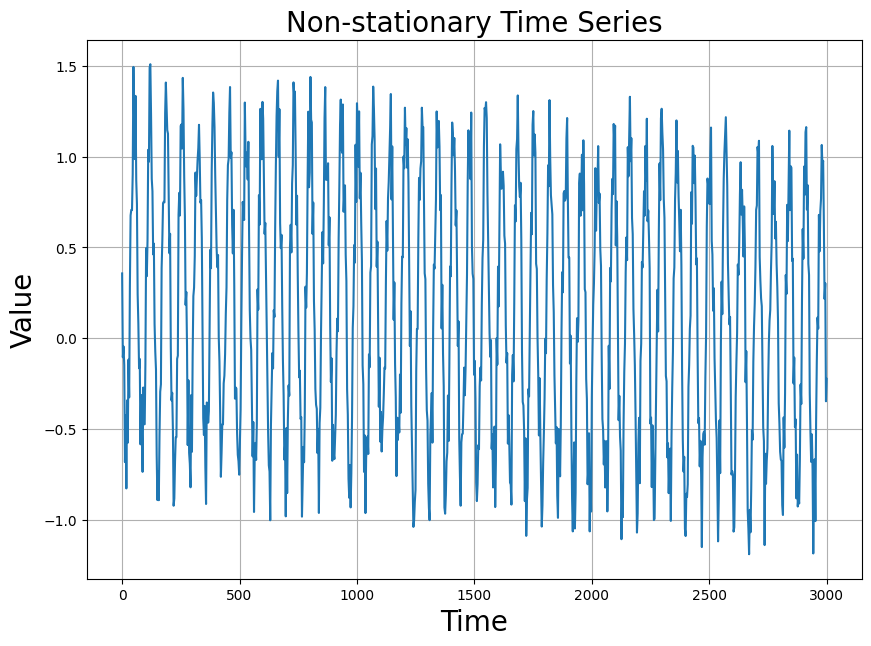

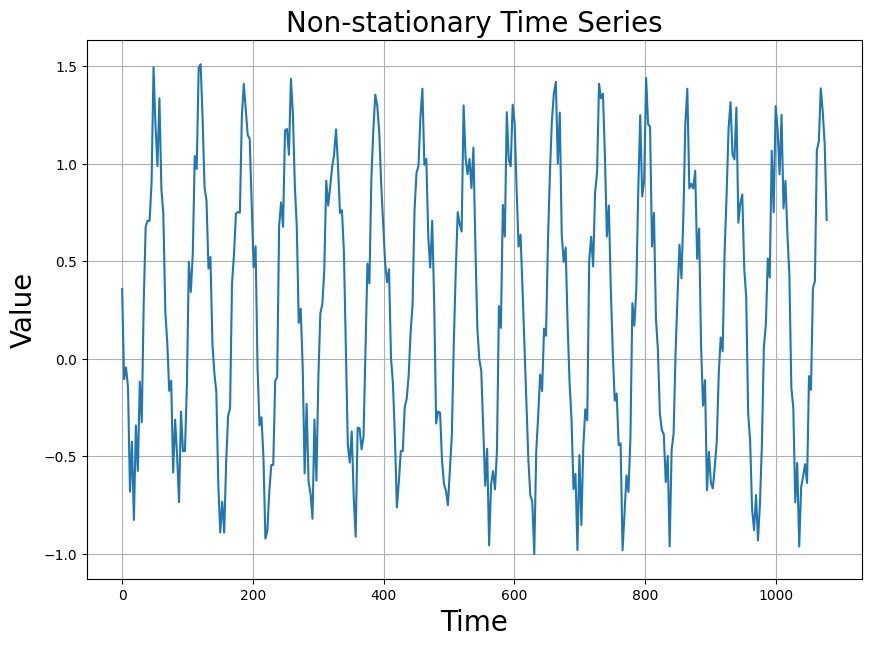

In [ ]:
noise_strength = 0.6
x = np.linspace(0, 3000, 1000)
y = 0.95*np.sin(2*x) + np.random.rand(len(x))*noise_strength + np.arange(1000)*(-0.0003)
plot_time_series(x, y, label="Non-stationary Time Series")
plot_time_series(x[:360], y[:360], label="Non-stationary Time Series")